# Deep-fake Forensics Challenge 🌐
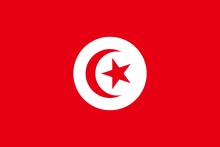



<span style="color:orange;font:bold">**IEEE COMPUTER SOCIETY ESPRIT SB**</span><br>

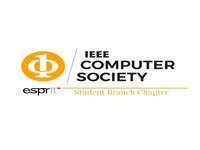

### **Team Members**

* Yasmine Mzoughi
* Adam Sfar
* Jihed Horchani
* Fares Frini
* Ons Kchaou
* Ahmed Hadded

 # <span style="color:#E3242B" >  I - Introduction</span>

Mounting the drive represents a critical step in maximizing efficiency. This process empowers immediate access and utilization of existing data directly from the source, bypassing the need for repetitive downloads. This not only saves valuable time but also streamlines workflows, ensuring seamless and readily available access to required data whenever needed. By eliminating the download bottleneck, we unlock a world of enhanced productivity and data exploration.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Following the successful mounting of the drive, we proceed to set the working directory. Subsequently, we commence the process of constructing and downloading the required data.

In [ ]:
%cd /content/drive/MyDrive

We clone the main project from github and we create new directory called data to put on it the required dataset used for both training and evaluation in same time 

In [ ]:
!git clone https://github.com/zjbthomas/ShallowDeepFakesLocalization.git

# <span style="color:#E3242B" > II - Downloading Required Datasets </span>

#### <span style="color:orange" > **Deepfakes** </span>

We use wget (linux command-line) to rapidly and directly download data in our working directory 

In [ ]:
!wget https://www.dropbox.com/s/o5410tl5v4vxsth/ICNC2023-Deepfakes.tar.xz

In [ ]:
import tarfile
import lzma

file_path = 'ICNC2023-Deepfakes.tar.xz'

with lzma.open(file_path, 'rb') as file:
    with tarfile.open(fileobj=file, mode='r') as tar:
        tar.extractall()

####  <span style="color:orange" > **CASIA V2**

CASIA V2 is hosted on Google Drive, so we utilize the gdown command to swiftly download the images and then use unzip to extract them .

In [ ]:
!gdown 1IDUgcoUeonBxx2rASX-_QwV9fhbtqdY8

In [ ]:
!unzip CASIA2.0_revised.zip

#### <span style="color:orange" > **CASIA V1**

CASIA V1 is accessible in a GitHub repository, and we clone the directory before extracting its contents into our designated drive directory.

In [ ]:
!git clone https://github.com/namtpham/casia1groundtruth.git
!unzip casia1groundtruth/CASIA 1.0 groundtruth.zip

#### <span style="color:orange" > **COLUMBIA**

In [ ]:
!wget https://www.dropbox.com/s/bo10et4p1zg08aj/ImSpliceDataset.rar


Here we used the rarfile library to extract our ".rar" file .

In [ ]:
import rarfile

# Specify the path to the RAR file
rar_file = "ImSpliceDataset.rar"

# Open the RAR file in read mode
with rarfile.RarFile(rar_file, "r") as rar:
    # Extract all files to the current directory
    rar.extractall()

# Print completion message
print("Files extracted successfully!")

#### <span style="color:orange" > **COVERAGE**

For COVERAGE, We manually downloaded the data and then uploaded it to the designated drive directory .

#### <span style="color:orange" >**NIST16**

for NIST16 , it is only dedicated for model testing.

In [ ]:
!wget https://mig.nist.gov/MFC/PubData/NC2016_Test0613.SCI.tgz
!wget https://mig.nist.gov/MFC/PubData/NC2016_Test0613.tar.bz2

In [ ]:
import tarfile

def create_tarball(file_path, tarball_name):
    with tarfile.open(tarball_name, "w:gz") as tar:
        tar.add(file_path, arcname=file_path)

# Replace 'NC2016_Test0613.SCI' with your actual file name
file_to_tar = 'NC2016_Test0613.SCI'
tarball_name = f'{file_to_tar}.tgz'

create_tarball(file_to_tar, tarball_name)
print(f'Tarball "{tarball_name}" created successfully.')

file_to_tar = 'NC2016_Test0613.tar'
tarball_name = f'{file_to_tar}.tgz'

create_tarball(file_to_tar, tarball_name)
print(f'Tarball "{tarball_name}" created successfully.')


Now after we downloaded all the required datasets, our Drive folder looks like this : 

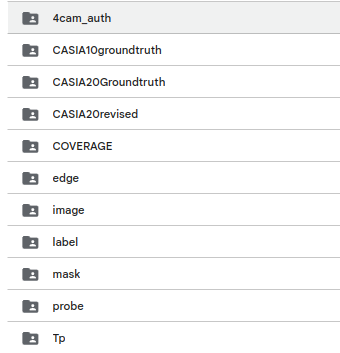

# <span style="color:#E3242B" > III - Updating Paths : </span> 

The subsequent task involves updating the image paths in train_paths.txt, val_paths.txt, and test_paths.txt from the provided paths.zip file, enabling us to proceed with training the model.

# <span style="color:#E3242B" > VI - Environments Preparation : </span> 

In this section, our focus is on setting up our working environments by installing the necessary libraries and packages. This step is crucial due to the absence of documentation and a requirements of .txt file outlining the specific environment configurations within the main project .

In [ ]:
!pip install -q torch torchvision torchdata Ninja

##### Installation is now complete, paving the way for both the reproduction of the paper's results and the commencement of model training.